In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
# read the data 
# import csv
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data cleaning 

In [4]:
df.shape

(8807, 12)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# rename column 'date_added'

In [ ]:
df.rename(columns = {'date_added' : 'Release_date'}) 

In [ ]:
# Check Null Values

In [6]:
df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [ ]:
# showin the null data from 'dierctor' column

df[df['director'].isna() == 1]

In [4]:
df['director'] = df['director'].fillna(0)

In [25]:
# Now all the elements from 'director' column
# should be = 0
df[df['director'].isna() == 1]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
# Checking the null 'cast' column

df[df['cast'].isna() == 1]

In [5]:
# Now all the data Null in 'cast' column should =0

df['cast'] = df['cast'].fillna(0)

In [ ]:
# Checking the null 'country' column

df[df['country'].isna()==1]

In [6]:
# Now all the data Null in 'country' column should =0

df['country'] = df['country'].fillna(0)

In [ ]:
# Checking the null 'date_added' column

df[df['date_added'].isna()== 1]

In [7]:
# Now all the data Null in 'date_added' column should =0

df['date_added']= df['date_added'].fillna(0)

In [ ]:
# Checking the null 'rating' column

df[df['rating'].isna()== 1]

In [8]:
# Now all the data Null in 'date_added' column should =0

df['rating'] = df['rating'].fillna(0)

In [48]:
# Checking the null 'duration' column

df[df['duration'].isna()==1]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [9]:
# Now all the data Null in 'date_added' column should =0
df['duration'] = df['duration'].fillna(0)

In [17]:
# now all the rows not null 

df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [10]:
df['date_added'] = df['date_added'].fillna(0)

In [18]:
# now if we check 'title' column where ='Jailbirds New Orleans'
# we find the na data are now =0

df[df['title'] == 'Jailbirds New Orleans']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3,s4,TV Show,Jailbirds New Orleans,0,0,0,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [19]:
# drop duplicates

In [50]:
# looking if there a duplicates columns 
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [ ]:
# showin the null data from 'dierctor' column

df[df['director'].duplicated() == 1]

In [ ]:
# loking for if there a value in the data duplacated
# called 'Jailbirds New Orleans'

df[df['director'].isin(['Jailbirds New Orleans'])]

In [32]:
# droping every duplicates rows 
df = df.drop_duplicates()

In [ ]:
# dropping the 'description'& 'show_id' columns

df.drop(columns = ['description'], inplace = True) 
df.drop(columns = ['show_id'], inplace = True)


## Data Visualization

In [70]:
# looking which coutry has prodect more show, Tv of Movie..
df['country'].value_counts().sort_values(ascending = False).to_frame()

,count
country,
United States,2818
India,972
0,831
United Kingdom,419
Japan,245
...,...
"Ireland, United Kingdom, Greece, France, Netherlands",1
"France, Canada, Italy, United States, China",1
"United States, Venezuela",1


In [93]:
df['title'].index

RangeIndex(start=0, stop=8807, step=1)

In [90]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

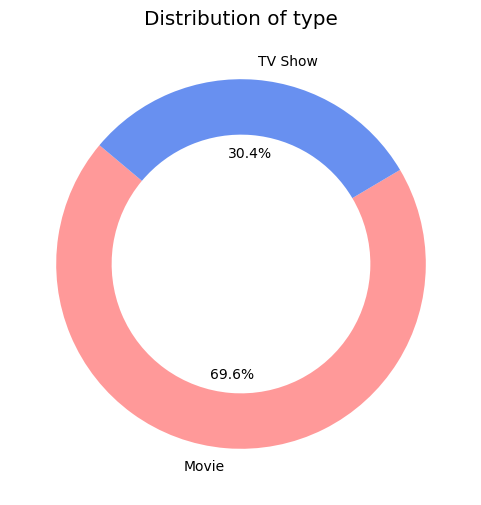

In [11]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt

df['type'].value_counts()
Types_counts  = df['type'].value_counts()

itemValue = Types_counts.values
itemName = Types_counts.index
colors = ['#FF9999', '#6890F0']
explode = (0,0.0)

plt.figure(figsize = (6,6))
plt.pie(itemValue, labels = itemName, colors = colors, explode = explode,
       autopct='%1.1f%%', startangle = 140,  wedgeprops = dict(width=0.3))



plt.title('Distribution of type', fontsize ='x-large')

plt.show()

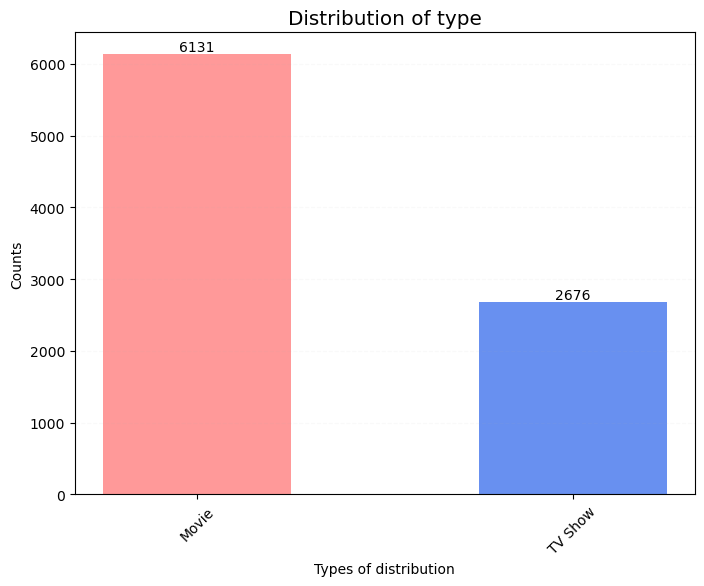

In [12]:
# import libraries 

import pandas as pd
import matplotlib.pyplot as plt

df['type'].value_counts()
Types_counts  = df['type'].value_counts()

itemValue = Types_counts.values
itemName = Types_counts.index
bar_width = 0.4 
colors = ['#FF9999', '#6890F0']


plt.figure(figsize = (8, 6))
plt.bar(itemName,itemValue,  color = colors, width = 0.5)

for i in range(len(itemName)):
    plt.text(i, itemValue[i],itemValue[i], ha='center', va='bottom')
    
plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle='--', alpha=0.07)


plt.title('Distribution of type', fontsize ='x-large')
plt.xlabel('Types of distribution')
plt.ylabel('Counts')

plt.show()

In [16]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,0,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",0,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,0,0,0,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [14]:
df['country'].value_counts()

country
United States                             2818
India                                      972
0                                          831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

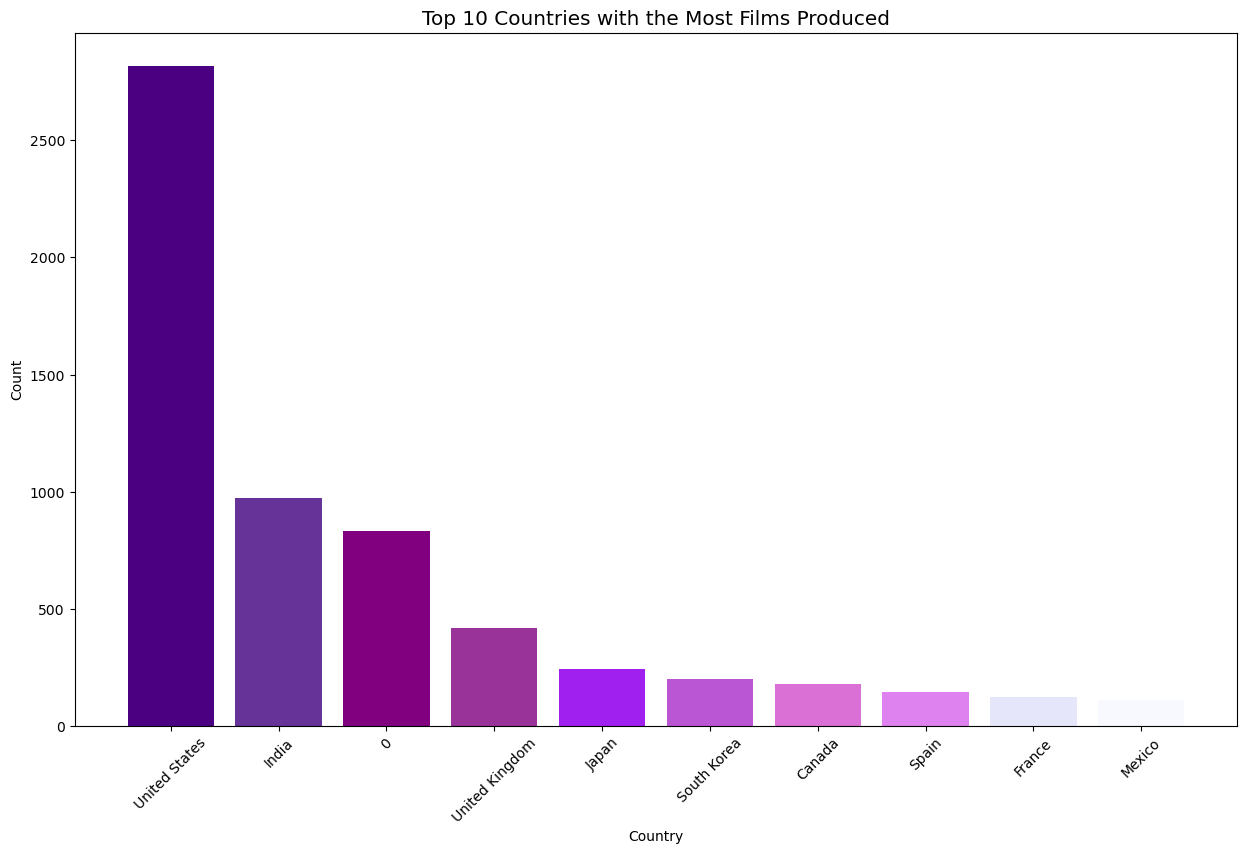

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a column 'country' containing country names
country_counts = df['country'].value_counts()

# Select the top 10 countries
top_countries = country_counts.head(10)

# Define colors for the bars
colors = ['#4b0082', '#663399', '#800080', '#993399', '#a020f0', '#ba55d3', '#da70d6', '#dd82ee', '#e6e6fa', '#f8f8ff']

# Plot the bar chart
plt.figure(figsize=(15, 9))
plt.bar(top_countries.index.astype(str), top_countries.values, color=colors)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries with the Most Films Produced', fontsize='x-large')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [190]:
df['release_year'].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

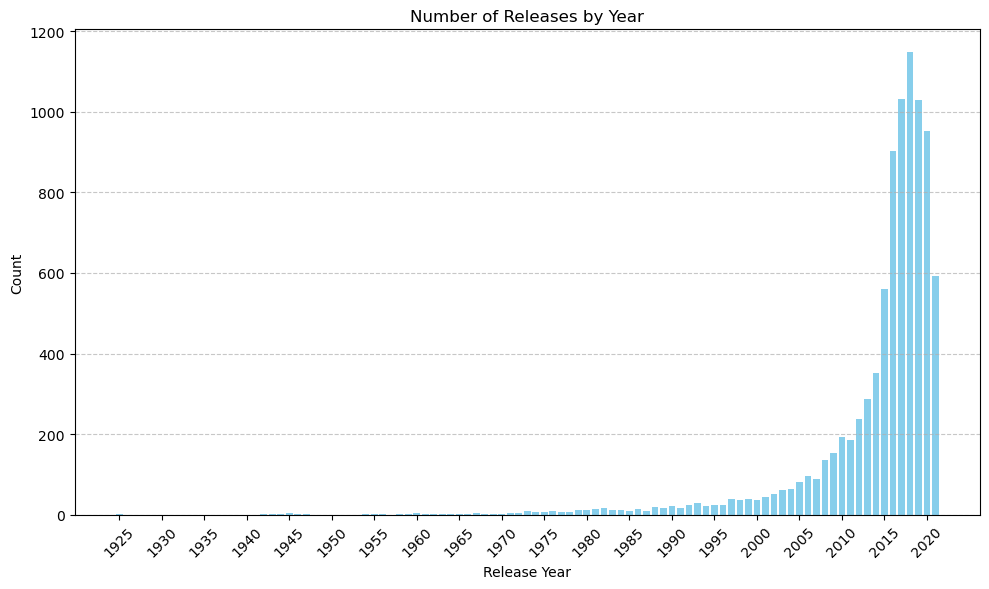

In [20]:
import matplotlib.pyplot as plt

# Assuming 'release_counts' represents the count of releases for each year
release_counts = df['release_year'].value_counts().sort_index()

# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(release_counts.index, release_counts.values, color='skyblue')

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Number of Releases by Year')

# Set x-axis ticks to show every 5 years
plt.xticks(range(min(release_counts.index), max(release_counts.index)+1, 5), rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [210]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', 0,
       'TV-Y7-FV', 'UR'], dtype=object)

In [214]:
df['rating'].value_counts().sort_values(ascending = False).to_frame()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


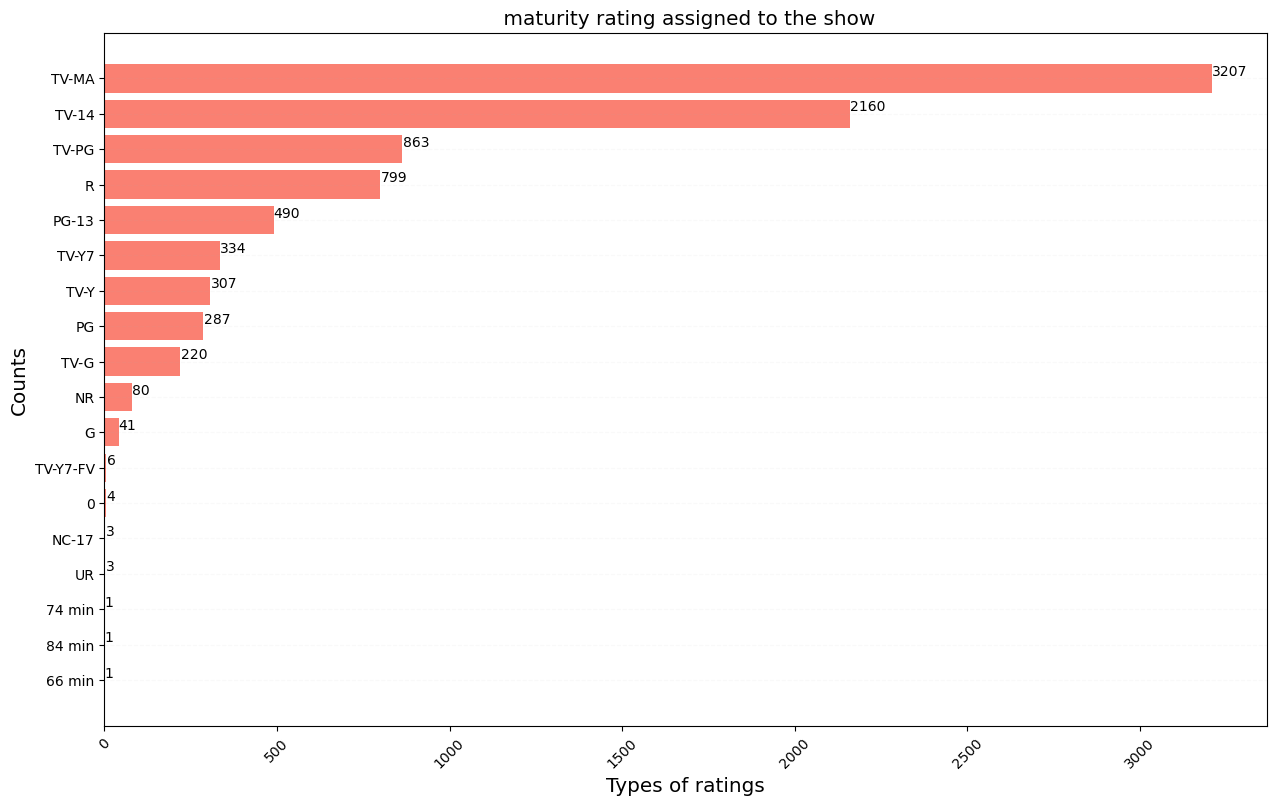

In [21]:
df['rating'].value_counts()

itemName = df['rating'].value_counts().index
itemValue = df['rating'].value_counts().values


plt.figure(figsize = (15, 9))
plt.barh(itemName.astype(str), itemValue, color= 'salmon')

    
plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle='--', alpha=0.07)

plt.gca().invert_yaxis()

for i in range(len(itemName)):
    plt.text(itemValue[i]+0.5, i, itemValue[i], ha= 'left', va ='bottom')


plt.title(' maturity rating assigned to the show', fontsize ='x-large')
plt.xlabel('Types of ratings', fontsize= 'x-large')
plt.ylabel('Counts', fontsize= 'x-large')

plt.show()

In [236]:
df['listed_in'].sort_values().sort_values(ascending = False)

1034             Thrillers
7065             Thrillers
8281             Thrillers
1358             Thrillers
3429             Thrillers
               ...        
437     Action & Adventure
1936    Action & Adventure
8564    Action & Adventure
559     Action & Adventure
1659    Action & Adventure
Name: listed_in, Length: 8807, dtype: object

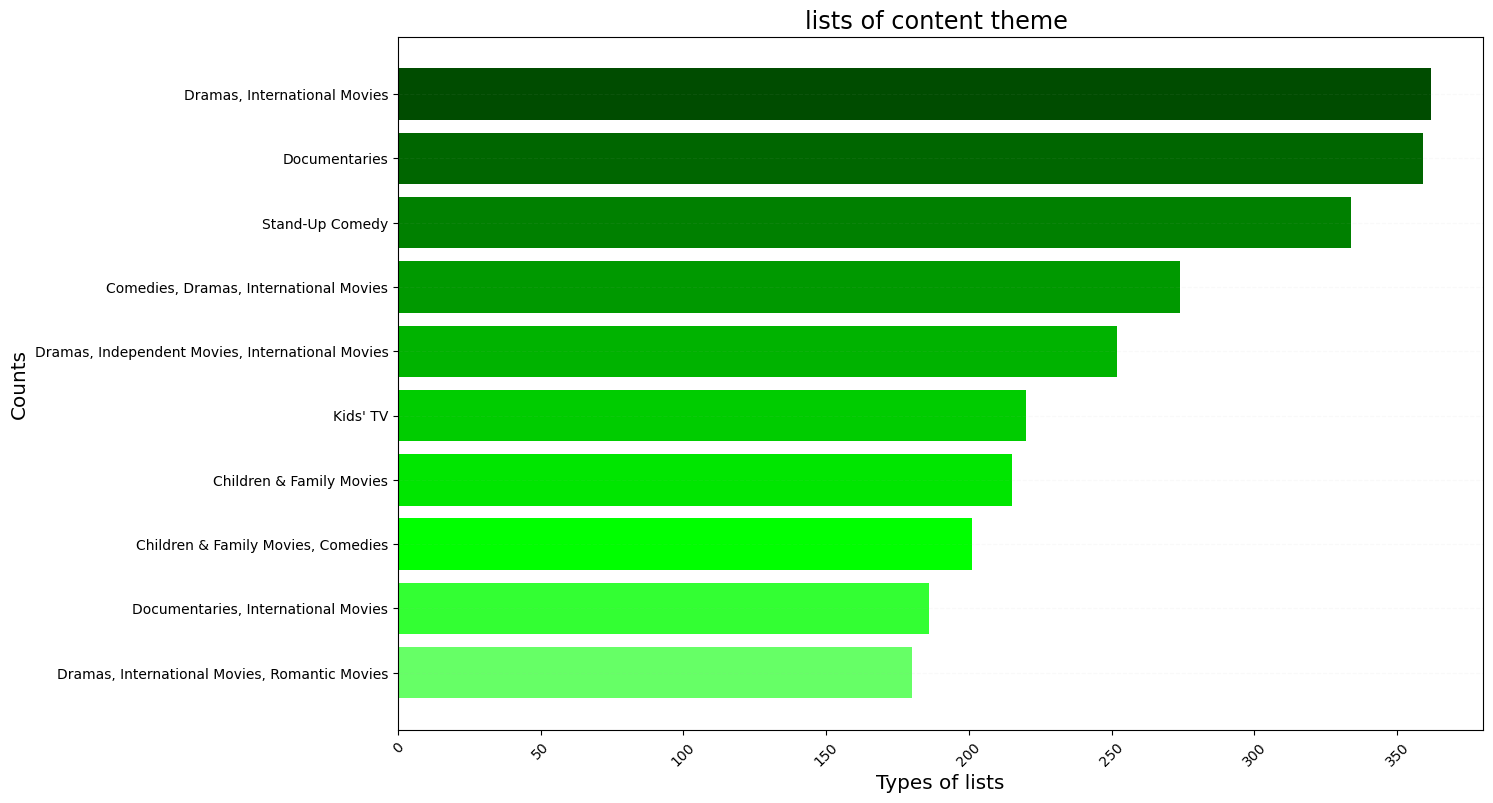

In [22]:
df['listed_in'].value_counts().sort_index()

itemName = df['listed_in'].value_counts().index[:10]
itemValue = df['listed_in'].value_counts().values[:10]
colors = ['#004c00', '#006600', '#008000', '#009900', '#00b300', '#00cc00', '#00e600', '#00ff00', '#33ff33', '#66ff66']


plt.figure(figsize = (14, 9))
plt.barh(itemName.astype(str), itemValue, color= colors)

    
plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle='--', alpha=0.07)

plt.gca().invert_yaxis()

plt.title('lists of content theme ', fontsize ='xx-large')
plt.xlabel('Types of lists', fontsize= 'x-large')
plt.ylabel('Counts', fontsize= 'x-large')

plt.show()

In [275]:
df['date_added'].value_counts().to_frame()

,count
date_added,
"January 1, 2020",109
"November 1, 2019",89
"March 1, 2018",75
"December 31, 2019",74
"October 1, 2018",71
...,...
"December 4, 2016",1
"November 21, 2016",1
"November 19, 2016",1


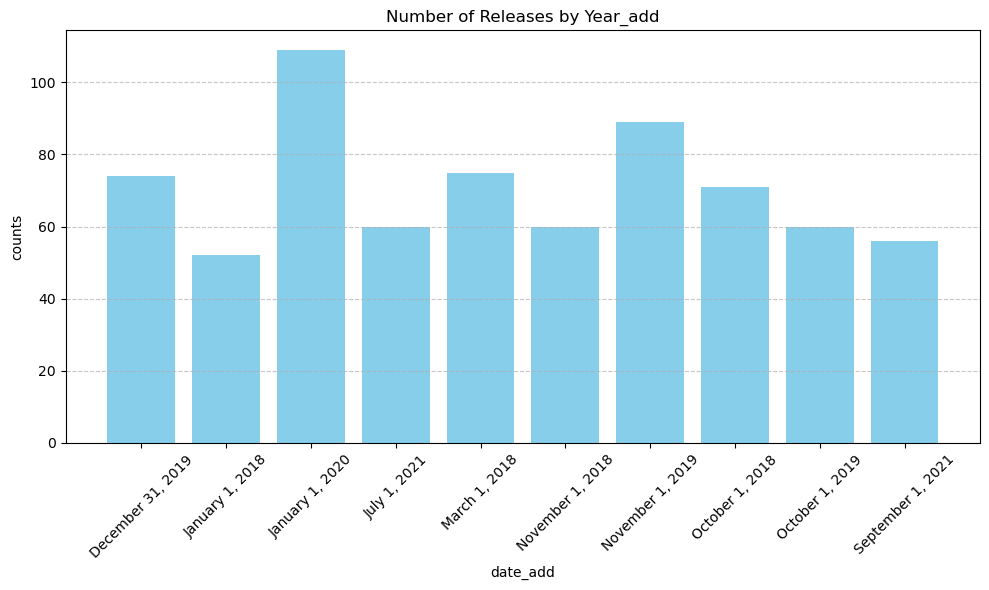

In [23]:
df['date_added'].value_counts().to_frame()

import matplotlib.pyplot as plt

# Assuming 'release_counts' represents the count of releases for each year
date_counts = df['date_added'].value_counts()[:10].sort_index()

# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(date_counts.index, date_counts.values, color='skyblue')

plt.xlabel('date_add')
plt.ylabel('counts')
plt.title('Number of Releases by Year_add')

plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [24]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,0,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",0,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,0,0,0,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [27]:
# split/separer between value in the column 
# separet between months and years in column 'date_added'
# add two columns 'months_of_added'
# add column 'years_od_added'


df['months_of_added'] = df['date_added'].str.split(pat = ',').str[0]
df['year_of_added'] = df['date_added'].str.split(pat = ',').str[1]

In [30]:
df['year_of_added']

0        2021
1        2021
2        2021
3        2021
4        2021
        ...  
8802     2019
8803     2019
8804     2019
8805     2020
8806     2019
Name: year_of_added, Length: 8807, dtype: object

In [31]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,months_of_added,year_of_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,0,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September 25,2021
1,s2,TV Show,Blood & Water,0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September 24,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",0,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September 24,2021
3,s4,TV Show,Jailbirds New Orleans,0,0,0,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September 24,2021


In [33]:
df['year_of_added'].unique()

array([' 2021', ' 2020', ' 2019', ' 2018', ' 2017', ' 2016', ' 2015',
       ' 2014', ' 2013', ' 2012', ' 2011', ' 2009', ' 2008', nan, ' 2010'],
      dtype=object)

In [34]:
df.fillna(0)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,months_of_added,year_of_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,0,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September 25,2021
1,s2,TV Show,Blood & Water,0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September 24,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",0,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September 24,2021
3,s4,TV Show,Jailbirds New Orleans,0,0,0,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September 24,2021
4,s5,TV Show,Kota Factory,0,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September 24,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November 20,2019
8803,s8804,TV Show,Zombie Dumb,0,0,0,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July 1,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November 1,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January 11,2020


In [35]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,months_of_added,year_of_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,0,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September 25,2021
1,s2,TV Show,Blood & Water,0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September 24,2021


In [37]:
import numpy as np
df[df['type']=='Movie', np.where df['cast'] == 0]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1249216292.py, line 2)